# 2.7 Statistical Considerations for geoscientific Data and Noise


## Canonical Distributions in Geoscientific Data
1. **Normal Distribution**: Used for variables like temperature, sea level variations, or wind speeds where values are symmetrically distributed.
2. **Log-Normal Distribution**: Often observed in phenomena where values can’t be negative and show long tails, such as earthquake magnitudes, rainfall, and river flow.
3. **Exponential Distribution**: Applied in modeling time intervals between events, such as the time between earthquakes.
4. **Power-Law Distribution:** Seen in rare, large-scale events like landslides, wildfires, or large earthquakes.



## 1. Statistical Features

Let be $P(z)$ the distribution of the data $z$.

### The mean

![mean](../img/mean.png)

Image taken from this [blog](!https://gregorygundersen.com/blog/2020/04/11/moments).

The mean is the sum of the values divided by the number of data points. It is the first raw moment of a distribution. 
$\mu = \int_{-\infty}^\infty zP(z)dz$, where z is the ground motion value (bin) and $P(z)$ is the distribution of the data.

### The Variance

![variance](../img/variance.png)

The variance is the second *centralized* moment. *Centralized* means that the distribution is shifted around the mean. It calculates how spread out is a distribution.

$\sigma^2 = \int_{-\infty}^\infty (z-\mu)^2P(z)dz$

The standard deviation is the square root of the variance, $\sigma$. A high variance indicates a wide distribution.

### The skewness

Skewness is the third *standardized* moment. The *standardized* moment is scaled by the standard deviation. It measures the relative size of the two tails of the distribution.


$m_3= \int_{-\infty}^\infty \frac{(z - \mu)^3}{\sigma^3}P(z)dz$

With the cubic exponent, it is possible that the skewness is negative.

![skewness](../img/skewness.png)

Image taken from this [blog](!https://gregorygundersen.com/blog/2020/04/11/moments).

A positively skewed distribution is one where most of the weight is at the end of the distribution. A negatively skewed distribution is one where most of the weight is at the beginning of the distribution.


### Kurtosis

Kurtosis measures the combined size of the two tails relative to the whole distribution. It is the fourth centralized and standardized moment.

$m_4= \int_{-\infty}^\infty (\frac{z-\mu}{\sigma})^4P(z)dz$

 ![kurtosis](../img/kurtosis.png)
The laplace, normal, and uniform distributions have a mean of 0 and a variance of 1. But their kurtosis is 3, 0, and -1.2.


Python functions to calculate the moments might be:

In [194]:
# Import modules for seismic data and feature extraction
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st
import scipy.signal as sig

In [195]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    return raw_moment(X=X, k=k, c=X.mean())

## 2. Geological data sets [Level 1]

We will explore the composition of Granite in terms of Silicate and Magnesium content. The data was collected from EarthChem database.

In [3]:
# Load .csv data into a pandas dataframe
import pandas as pd
url = 'https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/main/data/EarthRocGranites.csv'
df = pd.read_csv(url)
df.head()

,SIO2(WT%),MGO(WT%)
0,72.57,0.49
1,70.39,0.84
2,71.60,0.59
3,68.93,0.81
4,71.07,0.76


Data pre-processing is often necessary, and most importantly, it is critical to record any processing step to raw data. Do not change the original data file, instead record processing steps. Below, we drop the rows with NaNs (not a number).

In [197]:
df = df.dropna()    # remove rows with NaN values
df.head()   # describe the data

,SIO2(WT%),MGO(WT%)
0,72.57,0.49
1,70.39,0.84
2,71.60,0.59
3,68.93,0.81
4,71.07,0.76


Pandas python software includes methods to report basics data statistics. Use the function ``describe`` to the Pandas data frame.

In [198]:
df.describe()

,SIO2(WT%),MGO(WT%)
count,15924.000000,15924.000000
mean,72.113026,0.613687
std,4.103932,0.942135
min,8.710000,0.000000
25%,70.100000,0.170000
50%,72.750000,0.390000
75%,74.890000,0.780000
max,93.010000,57.000000


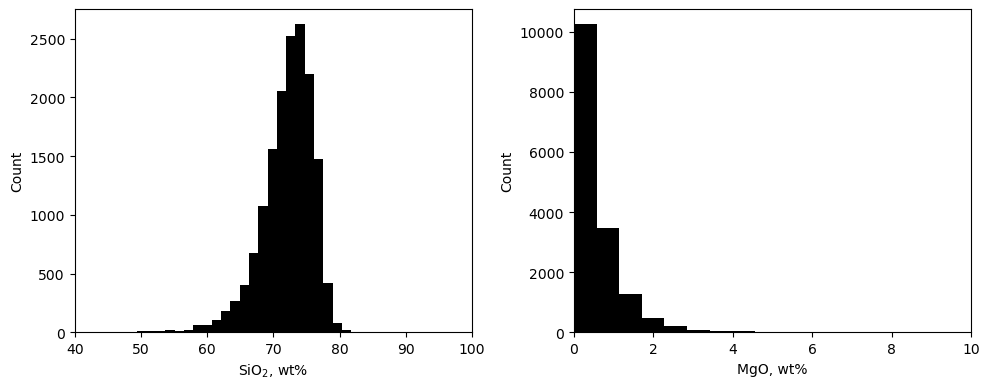

In [199]:
# Now, let's visualize the histograms of silica and magnesium

# Create a subplot with two histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot the histograms for each column
axes[0].hist(df['SIO2(WT%)'], bins=60, color='black')
axes[0].set_xlabel('SiO$_2$, wt%')
axes[0].set_ylabel('Count')
axes[0].set_xlim([40, 100])

axes[1].hist(df['MGO(WT%)'], bins=100, color='black')
axes[1].set_xlabel('MgO, wt%')
axes[1].set_ylabel('Count')
# Note these xlims -> the data largely [but not completely!] sit between 0 and 10 wt%
axes[1].set_xlim([0, 10])

# Add spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

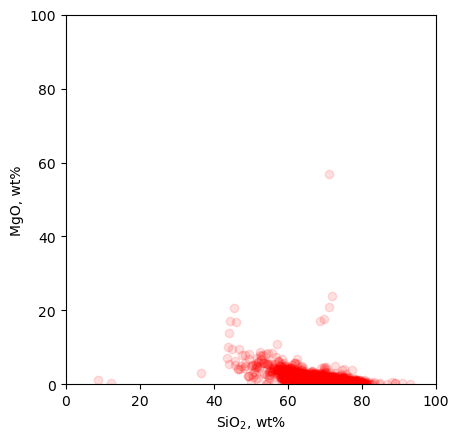

In [200]:
# One more plot: let's look at a scatter of SiO2 vs. MgO
plt.scatter(df['SIO2(WT%)'], df['MGO(WT%)'], c='red', alpha=0.125)
ax = plt.gca()
ax.set_xlim([0,100])
ax.set_xlabel('SiO$_2$, wt%')
ax.set_ylim([0,100])
ax.set_ylabel('MgO, wt%')
ax.set_aspect('equal')

Now, let's generate *moments* for SiO$_2$



In [201]:
# Let us first define the moment functions

def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    return raw_moment(X=X, k=k, c=X.mean())

# The mean:
print(f'The mean is: {raw_moment(df["SIO2(WT%)"], 1):4.2f}')

# Variance:
print(f'The variance is: {central_moment(df["SIO2(WT%)"], 2):4.2f}')

# Skewness:
skewness = central_moment(df["SIO2(WT%)"], 3) / central_moment(df["SIO2(WT%)"], 2) ** (3/2)
print(f'The skewness is: {skewness:4.2f}')

# Kurtosis
kurtosis_value = central_moment(df['SIO2(WT%)'], 4) / central_moment(df['SIO2(WT%)'], 2) ** 2
print(f'The kurtosis is: {kurtosis_value:4.2f}')

The mean is: 72.11
The variance is: 16.84
The skewness is: -1.75
The kurtosis is: 13.67


In [202]:
# We can also just use pandas (or numpy or scipy):

print('The mean is: %4.2f, the variance is: %4.2f, the skewness is: %4.2f, and the kurtosis is: %4.2f' % (df['SIO2(WT%)'].mean(), df['SIO2(WT%)'].var(), df['SIO2(WT%)'].skew(), df['SIO2(WT%)'].kurtosis()))


The mean is: 72.11, the variance is: 16.84, the skewness is: -1.75, and the kurtosis is: 10.67


Now in class, calculate the statistical moments between the clean data, the noise, and the noisy data. Explore what features might be discriminate between **signal** and **noise** and explore their sensitivity to noise levels.


We can now calculate the mean, variance, skewness, and kurtosis of the data:


In [220]:
# enter answers here using the functions for the moment.
# the mean:
print(raw_moment(news,1))

# the variance:
print(central_moment(news,2))

# the skewness
print(central_moment(news,3)/central_moment(news,2)**(3/2))

# the kurtosis
print(central_moment(news,4)/central_moment(news,2)**2)



1.7763568394002505e-18
0.07508417348193797
0.2970118992746436
4.060298649528828


We can also use the numpy and scipy modules to get these values

In [221]:
print('the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(news),np.std(news)**2,scipy.stats.skew(news),scipy.stats.kurtosis(news,fisher=False)))

the mean is 0.00, the variance is 0.08, the skewness is 0.30, the kurtosis is 4.06


## 3. Geoscientific distributions

**Example 1**: Sampling from the Normal Distribution

Application: Simulate temperature variations at a specific location over time.

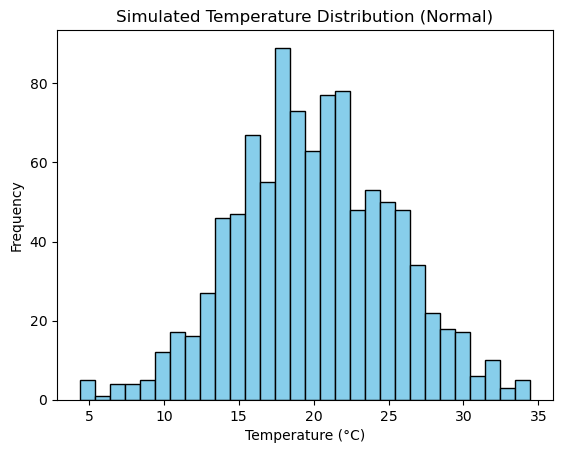

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating temperatures using a normal distribution
mean_temp = 20  # Mean temperature (°C)
std_temp = 5    # Standard deviation (°C)

temperatures = np.random.normal(loc=mean_temp, scale=std_temp, size=1000)

plt.hist(temperatures, bins=30, color='skyblue', edgecolor='black')
plt.title('Simulated Temperature Distribution (Normal)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


**Example 2**: Sampling from the Log-Normal Distribution

Application: Model earthquake magnitudes or river flows, which often follow a skewed log-normal distribution.

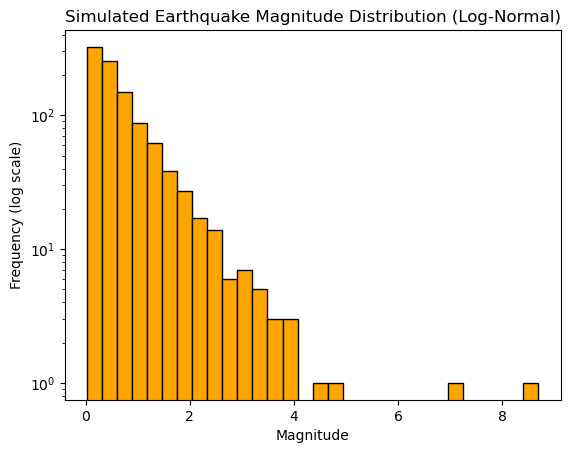

In [12]:
shape, scale = 0.9, 0.5  # Shape and scale parameters for log-normal
earthquake_magnitudes = np.random.lognormal(mean=np.log(scale), sigma=shape, size=1000)

plt.hist(earthquake_magnitudes, bins=30, color='orange', edgecolor='black', log=True)
plt.title('Simulated Earthquake Magnitude Distribution (Log-Normal)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency (log scale)')
plt.show()


This examples generates 1000 simulated earthquake magnitudes using a log-normal distribution. The long-tail property of the distribution mirrors the nature of geophysical events like earthquakes.

**Example 3:** Power-Law Distributions

Application in Geosciences: Power-law distributions are often observed in natural hazard occurrences like landslides or earthquakes, where small events are common, but large events are rare.

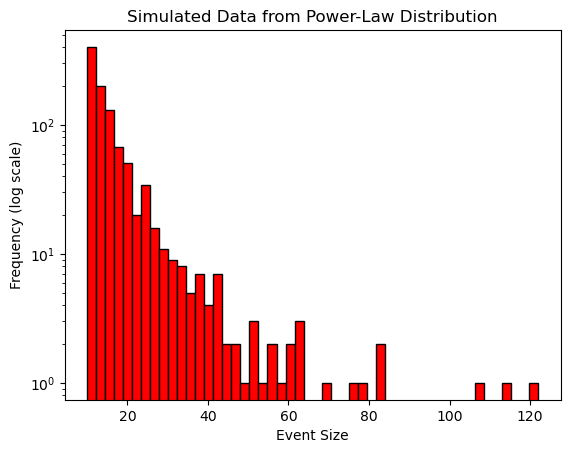

In [13]:
# Generating samples from a power-law distribution
a = 2.5  # Shape parameter (the larger, the more skewed)
size = 1000

power_law_data = (np.random.pareto(a, size) + 1) * 10  # Shifted Pareto distribution

plt.hist(power_law_data, bins=50, color='red', edgecolor='black', log=True)
plt.title('Simulated Data from Power-Law Distribution')
plt.xlabel('Event Size')
plt.ylabel('Frequency (log scale)')
plt.show()


The power-law distribution captures the tail-heavy behavior typical of geophysical processes like earthquakes or landslides.